# Análisis Estadístico: Indicador TREC (Tiempo de Respuesta ante Eventos Correctivos)

**Autor:** Análisis Tesis de Ingeniería  
**Fecha:** Octubre 2025  
**Objetivo:** Evaluar el impacto del sistema implementado en el tiempo de respuesta ante eventos correctivos

## Estructura del Análisis

1. **Análisis Descriptivo**: Estadísticos clave y comparación preprueba vs postprueba
2. **Visualizaciones**: Boxplots, histogramas y gráficos comparativos profesionales
3. **Análisis Inferencial**: Pruebas de normalidad, t-test pareado/Wilcoxon, tamaño del efecto
4. **Interpretación**: Conclusiones estadísticas y significancia práctica

---

In [ ]:
# =============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, ttest_rel, wilcoxon
import warnings
import os
from datetime import datetime

# Configuración de warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Crear carpeta para resultados
os.makedirs('resultados_trec', exist_ok=True)

print("✓ Librerías importadas correctamente")
print("✓ Configuración de visualización establecida")
print("✓ Carpeta 'resultados_trec' creada/verificada")

✓ Librerías importadas correctamente
✓ Configuración de visualización establecida
✓ Carpeta 'resultados_trec' creada/verificada


In [ ]:
# =============================================================================
# 2. CARGA Y VALIDACIÓN DE DATOS
# =============================================================================

# Cargar datos de preprueba (ANTES de implementar el sistema)
df_pre = pd.read_csv('data/indicador1/trec_preprueba.csv')

# Cargar datos de postprueba (DESPUÉS de implementar el sistema)
df_post = pd.read_csv('data/indicador1/trec_postprueba.csv')

# Validación de datos
print("="*80)
print("VALIDACIÓN DE DATOS")
print("="*80)
print(f"\n📊 PREPRUEBA:")
print(f"   - Número de eventos: {len(df_pre)}")
print(f"   - Columnas: {list(df_pre.columns)}")
print(f"   - Valores nulos: {df_pre['tiempo_respuesta_min'].isnull().sum()}")
print(f"   - Rango: [{df_pre['tiempo_respuesta_min'].min():.2f}, {df_pre['tiempo_respuesta_min'].max():.2f}] min")

print(f"\n📊 POSTPRUEBA:")
print(f"   - Número de eventos: {len(df_post)}")
print(f"   - Columnas: {list(df_post.columns)}")
print(f"   - Valores nulos: {df_post['tiempo_respuesta_min'].isnull().sum()}")
print(f"   - Rango: [{df_post['tiempo_respuesta_min'].min():.2f}, {df_post['tiempo_respuesta_min'].max():.2f}] min")

# Extraer tiempos de respuesta para análisis
trec_pre = df_pre['tiempo_respuesta_min'].values
trec_post = df_post['tiempo_respuesta_min'].values

print(f"\n✓ Datos cargados y validados correctamente")
print(f"✓ n = {len(trec_pre)} eventos en cada fase (muestras pareadas)")

VALIDACIÓN DE DATOS

📊 PREPRUEBA:
   - Número de eventos: 86
   - Columnas: ['id_evento', 'fecha', 'turno', 'linea', 'tiempo_respuesta_min', 'tipo_evento']
   - Valores nulos: 0
   - Rango: [42.70, 95.40] min

📊 POSTPRUEBA:
   - Número de eventos: 86
   - Columnas: ['id_evento', 'fecha', 'turno', 'linea', 'tiempo_respuesta_min', 'tipo_evento']
   - Valores nulos: 0
   - Rango: [16.20, 36.40] min

✓ Datos cargados y validados correctamente
✓ n = 86 eventos en cada fase (muestras pareadas)


In [ ]:
# =============================================================================
# 3. ESTADÍSTICOS DESCRIPTIVOS
# =============================================================================

def calcular_estadisticos(datos, nombre_fase):
    """
    Calcula estadísticos descriptivos completos para una serie de datos.
    
    Parámetros:
    - datos: array de valores numéricos
    - nombre_fase: string identificador de la fase (para display)
    
    Retorna:
    - dict con todos los estadísticos calculados
    """
    return {
        'Fase': nombre_fase,
        'n': len(datos),
        'Media (min)': np.mean(datos),
        'Mediana (min)': np.median(datos),
        'Desv. Estándar (min)': np.std(datos, ddof=1),
        'Varianza': np.var(datos, ddof=1),
        'Mínimo (min)': np.min(datos),
        'Q1 (min)': np.percentile(datos, 25),
        'Q3 (min)': np.percentile(datos, 75),
        'Máximo (min)': np.max(datos),
        'Rango (min)': np.max(datos) - np.min(datos),
        'IQR (min)': np.percentile(datos, 75) - np.percentile(datos, 25),
        'CV (%)': (np.std(datos, ddof=1) / np.mean(datos)) * 100,
        'Error Estándar': np.std(datos, ddof=1) / np.sqrt(len(datos))
    }

# Calcular estadísticos para ambas fases
stats_pre = calcular_estadisticos(trec_pre, 'PREPRUEBA')
stats_post = calcular_estadisticos(trec_post, 'POSTPRUEBA')

# Crear DataFrame comparativo
df_stats = pd.DataFrame([stats_pre, stats_post])

print("\n" + "="*80)
print("ESTADÍSTICOS DESCRIPTIVOS COMPLETOS")
print("="*80)
print(df_stats.to_string(index=False))
print("="*80)


ESTADÍSTICOS DESCRIPTIVOS COMPLETOS
      Fase  n  Media (min)  Mediana (min)  Desv. Estándar (min)   Varianza  Mínimo (min)  Q1 (min)  Q3 (min)  Máximo (min)  Rango (min)  IQR (min)    CV (%)  Error Estándar
 PREPRUEBA 86    64.628488          62.85             14.244399 202.902914          42.7   52.9500    74.800          95.4         52.7    21.8500 22.040434        1.536013
POSTPRUEBA 86    24.967442          24.60              5.313793  28.236398          16.2   20.5625    28.675          36.4         20.2     8.1125 21.282890        0.573001


In [ ]:
# =============================================================================
# 4. ANÁLISIS COMPARATIVO Y MEJORA PORCENTUAL
# =============================================================================

# Calcular diferencias y mejora porcentual
diferencia_media = stats_pre['Media (min)'] - stats_post['Media (min)']
mejora_porcentual = (diferencia_media / stats_pre['Media (min)']) * 100
diferencia_mediana = stats_pre['Mediana (min)'] - stats_post['Mediana (min)']

print("\n" + "="*80)
print("ANÁLISIS COMPARATIVO: PREPRUEBA vs POSTPRUEBA")
print("="*80)
print(f"\n📉 REDUCCIÓN EN TIEMPO DE RESPUESTA:")
print(f"   • Media PREPRUEBA:    {stats_pre['Media (min)']:.2f} min")
print(f"   • Media POSTPRUEBA:   {stats_post['Media (min)']:.2f} min")
print(f"   • Diferencia absoluta: {diferencia_media:.2f} min")
print(f"   • MEJORA PORCENTUAL:   {mejora_porcentual:.2f}%")
print(f"\n📊 MEDIANA:")
print(f"   • Mediana PREPRUEBA:   {stats_pre['Mediana (min)']:.2f} min")
print(f"   • Mediana POSTPRUEBA:  {stats_post['Mediana (min)']:.2f} min")
print(f"   • Diferencia:          {diferencia_mediana:.2f} min")
print(f"\n📐 VARIABILIDAD:")
print(f"   • DE PREPRUEBA:        {stats_pre['Desv. Estándar (min)']:.2f} min (CV: {stats_pre['CV (%)']:.2f}%)")
print(f"   • DE POSTPRUEBA:       {stats_post['Desv. Estándar (min)']:.2f} min (CV: {stats_post['CV (%)']:.2f}%)")
print(f"\n📏 RANGO:")
print(f"   • PREPRUEBA:           [{stats_pre['Mínimo (min)']:.2f}, {stats_pre['Máximo (min)']:.2f}] min")
print(f"   • POSTPRUEBA:          [{stats_post['Mínimo (min)']:.2f}, {stats_post['Máximo (min)']:.2f}] min")
print("="*80)


ANÁLISIS COMPARATIVO: PREPRUEBA vs POSTPRUEBA

📉 REDUCCIÓN EN TIEMPO DE RESPUESTA:
   • Media PREPRUEBA:    64.63 min
   • Media POSTPRUEBA:   24.97 min
   • Diferencia absoluta: 39.66 min
   • MEJORA PORCENTUAL:   61.37%

📊 MEDIANA:
   • Mediana PREPRUEBA:   62.85 min
   • Mediana POSTPRUEBA:  24.60 min
   • Diferencia:          38.25 min

📐 VARIABILIDAD:
   • DE PREPRUEBA:        14.24 min (CV: 22.04%)
   • DE POSTPRUEBA:       5.31 min (CV: 21.28%)

📏 RANGO:
   • PREPRUEBA:           [42.70, 95.40] min
   • POSTPRUEBA:          [16.20, 36.40] min


---
## VISUALIZACIONES ESTADÍSTICAS
---

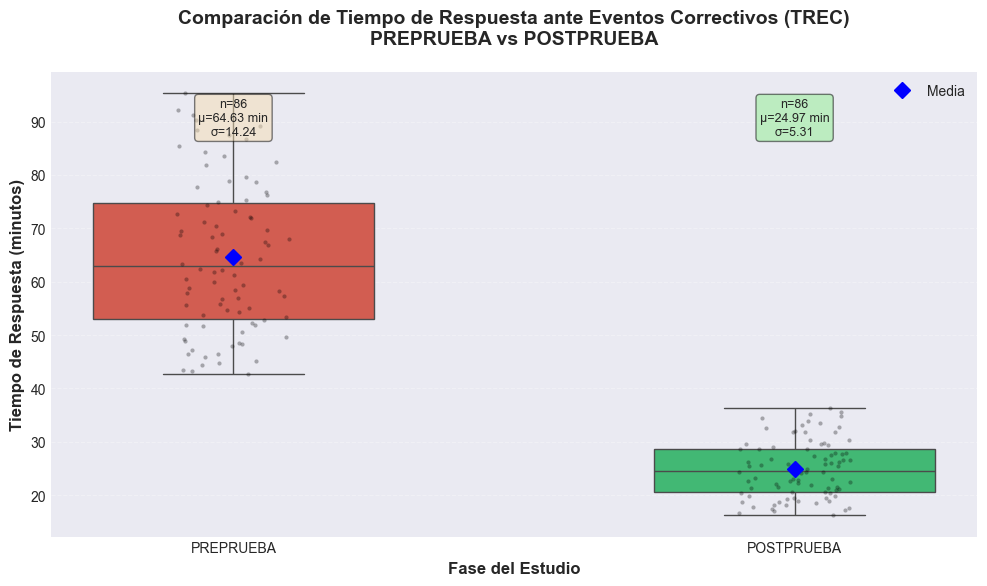

✓ Boxplot comparativo generado y guardado


In [ ]:
# =============================================================================
# 5. VISUALIZACIÓN 1: BOXPLOT COMPARATIVO
# =============================================================================

# Preparar datos para boxplot
data_boxplot = pd.DataFrame({
    'Tiempo de Respuesta (min)': np.concatenate([trec_pre, trec_post]),
    'Fase': ['PREPRUEBA']*len(trec_pre) + ['POSTPRUEBA']*len(trec_post)
})

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Crear boxplot con seaborn (más profesional)
bp = sns.boxplot(x='Fase', y='Tiempo de Respuesta (min)', data=data_boxplot, 
                 palette=['#E74C3C', '#2ECC71'], ax=ax, width=0.5)

# Agregar puntos individuales (opcional, pero profesional)
sns.stripplot(x='Fase', y='Tiempo de Respuesta (min)', data=data_boxplot, 
              color='black', alpha=0.3, size=3, ax=ax)

# Agregar líneas de media
medias = [stats_pre['Media (min)'], stats_post['Media (min)']]
x_positions = [0, 1]
ax.plot(x_positions, medias, 'D', color='blue', markersize=8, 
        label=f'Media', zorder=10)

# Personalización
ax.set_title('Comparación de Tiempo de Respuesta ante Eventos Correctivos (TREC)\nPREPRUEBA vs POSTPRUEBA', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.set_ylabel('Tiempo de Respuesta (minutos)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(loc='upper right')

# Agregar anotaciones con estadísticos
ax.text(0, ax.get_ylim()[1]*0.95, f'n={len(trec_pre)}\nμ={stats_pre["Media (min)"]:.2f} min\nσ={stats_pre["Desv. Estándar (min)"]:.2f}', 
        ha='center', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.text(1, ax.get_ylim()[1]*0.95, f'n={len(trec_post)}\nμ={stats_post["Media (min)"]:.2f} min\nσ={stats_post["Desv. Estándar (min)"]:.2f}', 
        ha='center', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('resultados_trec/01_boxplot_comparativo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Boxplot comparativo generado y guardado")

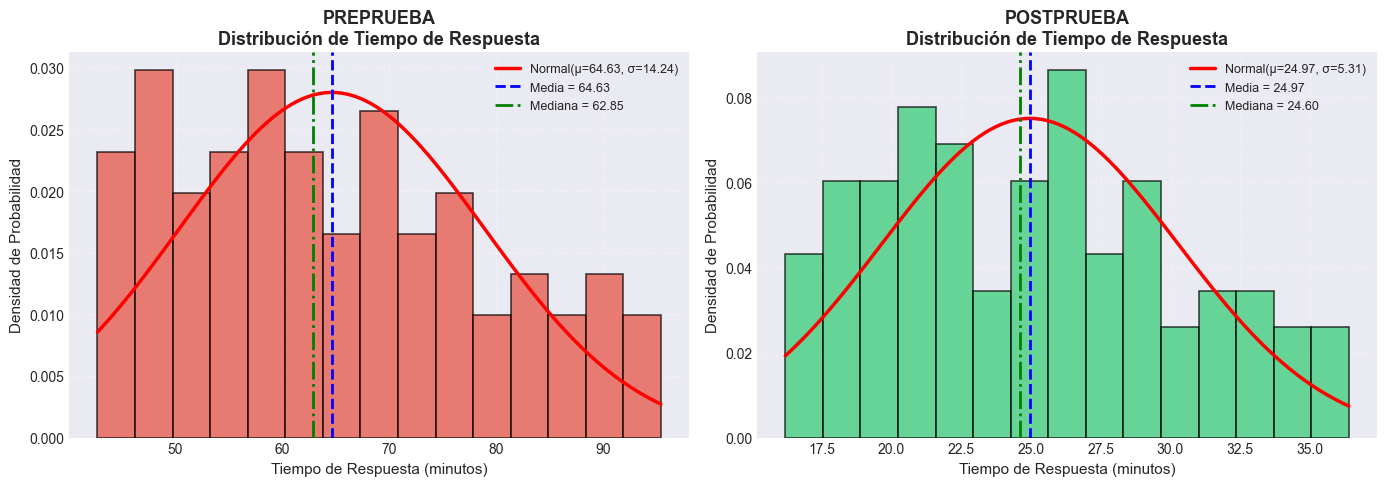

✓ Histogramas con curva normal generados y guardados


In [ ]:
# =============================================================================
# 6. VISUALIZACIÓN 2: HISTOGRAMAS CON CURVA NORMAL
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Función para agregar curva normal a histograma
def plot_histogram_with_normal(data, ax, title, color, stats_dict):
    # Histograma
    n, bins, patches = ax.hist(data, bins=15, density=True, alpha=0.7, 
                                color=color, edgecolor='black', linewidth=1.2)
    
    # Curva normal teórica
    mu = stats_dict['Media (min)']
    sigma = stats_dict['Desv. Estándar (min)']
    x = np.linspace(data.min(), data.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2.5, 
            label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})')
    
    # Línea de media
    ax.axvline(mu, color='blue', linestyle='--', linewidth=2, label=f'Media = {mu:.2f}')
    # Línea de mediana
    ax.axvline(stats_dict['Mediana (min)'], color='green', linestyle='-.', 
               linewidth=2, label=f'Mediana = {stats_dict["Mediana (min)"]:.2f}')
    
    # Personalización
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('Tiempo de Respuesta (minutos)', fontsize=11)
    ax.set_ylabel('Densidad de Probabilidad', fontsize=11)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3, linestyle='--')

# PREPRUEBA
plot_histogram_with_normal(trec_pre, axes[0], 
                           'PREPRUEBA\nDistribución de Tiempo de Respuesta', 
                           '#E74C3C', stats_pre)

# POSTPRUEBA
plot_histogram_with_normal(trec_post, axes[1], 
                           'POSTPRUEBA\nDistribución de Tiempo de Respuesta', 
                           '#2ECC71', stats_post)

plt.tight_layout()
plt.savefig('resultados_trec/02_histogramas_normalidad.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Histogramas con curva normal generados y guardados")

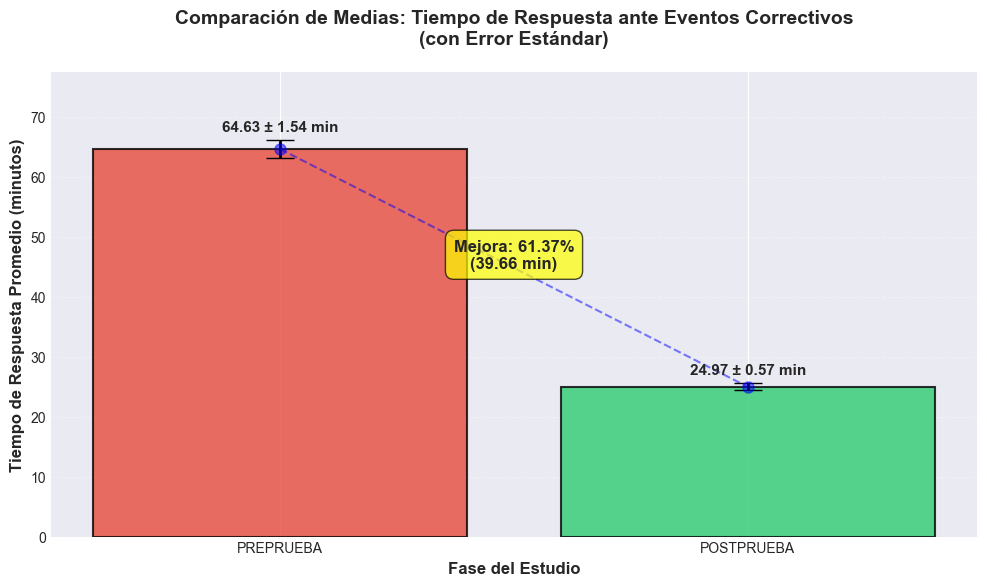

✓ Gráfico de barras con error estándar generado y guardado


In [ ]:
# =============================================================================
# 7. VISUALIZACIÓN 3: GRÁFICO DE BARRAS CON ERROR ESTÁNDAR
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Datos para barras
fases = ['PREPRUEBA', 'POSTPRUEBA']
medias = [stats_pre['Media (min)'], stats_post['Media (min)']]
errores = [stats_pre['Error Estándar'], stats_post['Error Estándar']]
colores = ['#E74C3C', '#2ECC71']

# Crear barras
barras = ax.bar(fases, medias, yerr=errores, capsize=10, 
                color=colores, alpha=0.8, edgecolor='black', linewidth=1.5,
                error_kw={'linewidth': 2, 'ecolor': 'black'})

# Agregar valores sobre las barras
for i, (bar, media, error) in enumerate(zip(barras, medias, errores)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error + 1,
            f'{media:.2f} ± {error:.2f} min',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Agregar línea de mejora
ax.plot([0, 1], medias, 'b--', linewidth=1.5, alpha=0.5, marker='o', markersize=8)

# Agregar anotación de mejora porcentual
mid_x = 0.5
mid_y = (medias[0] + medias[1]) / 2
ax.annotate(f'Mejora: {mejora_porcentual:.2f}%\n({diferencia_media:.2f} min)',
            xy=(mid_x, mid_y), fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            ha='center')

# Personalización
ax.set_title('Comparación de Medias: Tiempo de Respuesta ante Eventos Correctivos\n(con Error Estándar)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Tiempo de Respuesta Promedio (minutos)', fontsize=12, fontweight='bold')
ax.set_xlabel('Fase del Estudio', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(medias) * 1.2)

plt.tight_layout()
plt.savefig('resultados_trec/03_barras_medias_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico de barras con error estándar generado y guardado")

---
## ANÁLISIS INFERENCIAL
---

In [ ]:
# =============================================================================
# 8. PRUEBAS DE NORMALIDAD (Shapiro-Wilk)
# =============================================================================

# Realizar prueba de Shapiro-Wilk para cada fase
stat_pre, p_pre = shapiro(trec_pre)
stat_post, p_post = shapiro(trec_post)

# Calcular diferencias pareadas
diferencias = trec_pre - trec_post
stat_diff, p_diff = shapiro(diferencias)

# Nivel de significancia
alpha = 0.05

print("\n" + "="*80)
print("PRUEBAS DE NORMALIDAD: Shapiro-Wilk")
print("="*80)
print(f"\nH0: Los datos provienen de una distribución normal")
print(f"H1: Los datos NO provienen de una distribución normal")
print(f"Nivel de significancia: α = {alpha}")
print("\n" + "-"*80)

print(f"\n📊 PREPRUEBA:")
print(f"   • Estadístico W: {stat_pre:.6f}")
print(f"   • p-valor: {p_pre:.6f}")
print(f"   • Decisión: {'RECHAZAR H0 (NO normal)' if p_pre < alpha else 'NO RECHAZAR H0 (Normal)'}")
print(f"   • Interpretación: Los datos {'NO siguen' if p_pre < alpha else 'SIGUEN'} una distribución normal")

print(f"\n📊 POSTPRUEBA:")
print(f"   • Estadístico W: {stat_post:.6f}")
print(f"   • p-valor: {p_post:.6f}")
print(f"   • Decisión: {'RECHAZAR H0 (NO normal)' if p_post < alpha else 'NO RECHAZAR H0 (Normal)'}")
print(f"   • Interpretación: Los datos {'NO siguen' if p_post < alpha else 'SIGUEN'} una distribución normal")

print(f"\n📊 DIFERENCIAS PAREADAS (PRE - POST):")
print(f"   • Estadístico W: {stat_diff:.6f}")
print(f"   • p-valor: {p_diff:.6f}")
print(f"   • Decisión: {'RECHAZAR H0 (NO normal)' if p_diff < alpha else 'NO RECHAZAR H0 (Normal)'}")
print(f"   • Interpretación: Las diferencias {'NO siguen' if p_diff < alpha else 'SIGUEN'} una distribución normal")

print("\n" + "-"*80)
print(f"\n🔍 CONCLUSIÓN SOBRE NORMALIDAD:")
if p_pre >= alpha and p_post >= alpha and p_diff >= alpha:
    print("   ✓ TODAS las distribuciones son normales (p ≥ 0.05)")
    print("   ✓ RECOMENDACIÓN: Usar prueba T de Student pareada (paramétrica)")
    test_recomendado = "t-test pareado"
elif p_diff >= alpha:
    print("   ⚠ Las diferencias pareadas SON normales (p ≥ 0.05)")
    print("   ⚠ RECOMENDACIÓN: Usar prueba T de Student pareada (paramétrica)")
    test_recomendado = "t-test pareado"
else:
    print("   ✗ Al menos una distribución NO es normal (p < 0.05)")
    print("   ✓ RECOMENDACIÓN: Usar prueba de Wilcoxon (no paramétrica)")
    test_recomendado = "Wilcoxon"
    
print("="*80)


PRUEBAS DE NORMALIDAD: Shapiro-Wilk

H0: Los datos provienen de una distribución normal
H1: Los datos NO provienen de una distribución normal
Nivel de significancia: α = 0.05

--------------------------------------------------------------------------------

📊 PREPRUEBA:
   • Estadístico W: 0.958133
   • p-valor: 0.007078
   • Decisión: RECHAZAR H0 (NO normal)
   • Interpretación: Los datos NO siguen una distribución normal

📊 POSTPRUEBA:
   • Estadístico W: 0.963739
   • p-valor: 0.016298
   • Decisión: RECHAZAR H0 (NO normal)
   • Interpretación: Los datos NO siguen una distribución normal

📊 DIFERENCIAS PAREADAS (PRE - POST):
   • Estadístico W: 0.956057
   • p-valor: 0.005238
   • Decisión: RECHAZAR H0 (NO normal)
   • Interpretación: Las diferencias NO siguen una distribución normal

--------------------------------------------------------------------------------

🔍 CONCLUSIÓN SOBRE NORMALIDAD:
   ✗ Al menos una distribución NO es normal (p < 0.05)
   ✓ RECOMENDACIÓN: Usar prueba 

In [ ]:
# =============================================================================
# 9. PRUEBAS DE HIPÓTESIS: T-TEST PAREADO Y WILCOXON
# =============================================================================

print("\n" + "="*80)
print("PRUEBAS DE HIPÓTESIS: COMPARACIÓN PREPRUEBA vs POSTPRUEBA")
print("="*80)

# Hipótesis
print(f"\nH0 (Hipótesis Nula): μ_PREPRUEBA = μ_POSTPRUEBA (no hay diferencia)")
print(f"H1 (Hipótesis Alterna): μ_PREPRUEBA ≠ μ_POSTPRUEBA (hay diferencia significativa)")
print(f"Nivel de significancia: α = {alpha}")

# -------------------------
# 1. PRUEBA T DE STUDENT PAREADA (PARAMÉTRICA)
# -------------------------
t_stat, p_t = ttest_rel(trec_pre, trec_post)

print("\n" + "-"*80)
print("1️⃣  PRUEBA T DE STUDENT PAREADA (Paramétrica)")
print("-"*80)
print(f"   • Estadístico t: {t_stat:.6f}")
print(f"   • p-valor (bilateral): {p_t:.6f}")
print(f"   • Grados de libertad: {len(trec_pre) - 1}")
print(f"   • Decisión: {'RECHAZAR H0' if p_t < alpha else 'NO RECHAZAR H0'}")
print(f"   • Conclusión: {'Hay diferencia SIGNIFICATIVA' if p_t < alpha else 'NO hay diferencia significativa'}")

# -------------------------
# 2. PRUEBA DE WILCOXON (NO PARAMÉTRICA)
# -------------------------
w_stat, p_w = wilcoxon(trec_pre, trec_post, alternative='two-sided')

print("\n" + "-"*80)
print("2️⃣  PRUEBA DE WILCOXON (No Paramétrica)")
print("-"*80)
print(f"   • Estadístico W: {w_stat:.6f}")
print(f"   • p-valor (bilateral): {p_w:.6f}")
print(f"   • Decisión: {'RECHAZAR H0' if p_w < alpha else 'NO RECHAZAR H0'}")
print(f"   • Conclusión: {'Hay diferencia SIGNIFICATIVA' if p_w < alpha else 'NO hay diferencia significativa'}")

# -------------------------
# 3. PRUEBA RECOMENDADA SEGÚN NORMALIDAD
# -------------------------
print("\n" + "="*80)
print("🎯 PRUEBA RECOMENDADA Y CONCLUSIÓN FINAL")
print("="*80)

if test_recomendado == "t-test pareado":
    print(f"✓ Prueba recomendada: T DE STUDENT PAREADA (datos normales)")
    print(f"✓ Estadístico: t = {t_stat:.6f}")
    print(f"✓ p-valor: {p_t:.6f}")
    p_final = p_t
    test_final = "T de Student"
else:
    print(f"✓ Prueba recomendada: WILCOXON (datos NO normales)")
    print(f"✓ Estadístico: W = {w_stat:.6f}")
    print(f"✓ p-valor: {p_w:.6f}")
    p_final = p_w
    test_final = "Wilcoxon"

print(f"\n{'='*80}")
print(f"RESULTADO ESTADÍSTICO:")
if p_final < alpha:
    print(f"   ✅ RECHAZAMOS H0 (p = {p_final:.6f} < α = {alpha})")
    print(f"   ✅ Existe evidencia estadísticamente SIGNIFICATIVA de que")
    print(f"      el tiempo de respuesta DISMINUYÓ después de implementar el sistema")
    print(f"   ✅ Mejora promedio: {diferencia_media:.2f} minutos ({mejora_porcentual:.2f}%)")
else:
    print(f"   ❌ NO RECHAZAMOS H0 (p = {p_final:.6f} ≥ α = {alpha})")
    print(f"   ❌ NO hay evidencia estadísticamente significativa de diferencia")
print("="*80)


PRUEBAS DE HIPÓTESIS: COMPARACIÓN PREPRUEBA vs POSTPRUEBA

H0 (Hipótesis Nula): μ_PREPRUEBA = μ_POSTPRUEBA (no hay diferencia)
H1 (Hipótesis Alterna): μ_PREPRUEBA ≠ μ_POSTPRUEBA (hay diferencia significativa)
Nivel de significancia: α = 0.05

--------------------------------------------------------------------------------
1️⃣  PRUEBA T DE STUDENT PAREADA (Paramétrica)
--------------------------------------------------------------------------------
   • Estadístico t: 41.068224
   • p-valor (bilateral): 0.000000
   • Grados de libertad: 85
   • Decisión: RECHAZAR H0
   • Conclusión: Hay diferencia SIGNIFICATIVA

--------------------------------------------------------------------------------
2️⃣  PRUEBA DE WILCOXON (No Paramétrica)
--------------------------------------------------------------------------------
   • Estadístico W: 0.000000
   • p-valor (bilateral): 0.000000
   • Decisión: RECHAZAR H0
   • Conclusión: Hay diferencia SIGNIFICATIVA

🎯 PRUEBA RECOMENDADA Y CONCLUSIÓN FINAL

In [ ]:
# =============================================================================
# 10. TAMAÑO DEL EFECTO (d de Cohen) E INTERVALOS DE CONFIANZA
# =============================================================================

# Calcular d de Cohen para muestras pareadas
# d = media(diferencias) / desviación_estándar(diferencias)
d_cohen = np.mean(diferencias) / np.std(diferencias, ddof=1)

# Interpretación del tamaño del efecto según Cohen (1988)
def interpretar_cohen_d(d):
    d_abs = abs(d)
    if d_abs < 0.2:
        return "INSIGNIFICANTE (d < 0.2)"
    elif d_abs < 0.5:
        return "PEQUEÑO (0.2 ≤ d < 0.5)"
    elif d_abs < 0.8:
        return "MEDIANO (0.5 ≤ d < 0.8)"
    else:
        return "GRANDE (d ≥ 0.8)"

# Calcular intervalo de confianza al 95% para la diferencia de medias
from scipy.stats import t as t_dist

n = len(diferencias)
media_diff = np.mean(diferencias)
se_diff = np.std(diferencias, ddof=1) / np.sqrt(n)
t_critico = t_dist.ppf(0.975, df=n-1)  # 0.975 para IC bilateral al 95%

ic_inferior = media_diff - t_critico * se_diff
ic_superior = media_diff + t_critico * se_diff

print("\n" + "="*80)
print("TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA")
print("="*80)

print(f"\n📏 TAMAÑO DEL EFECTO (d de Cohen):")
print(f"   • d de Cohen: {d_cohen:.4f}")
print(f"   • Interpretación: {interpretar_cohen_d(d_cohen)}")
print(f"   • Dirección: {'Reducción' if d_cohen > 0 else 'Aumento'} en tiempo de respuesta")

print(f"\n📊 INTERVALO DE CONFIANZA AL 95% PARA LA DIFERENCIA DE MEDIAS:")
print(f"   • Diferencia media: {media_diff:.2f} minutos")
print(f"   • Error estándar: {se_diff:.2f} minutos")
print(f"   • t crítico (α=0.05, gl={n-1}): {t_critico:.4f}")
print(f"   • IC 95%: [{ic_inferior:.2f}, {ic_superior:.2f}] minutos")
print(f"   • Interpretación: Con 95% de confianza, la reducción promedio en tiempo")
print(f"                     de respuesta está entre {ic_inferior:.2f} y {ic_superior:.2f} minutos")

# Verificar si el IC contiene el cero
if ic_inferior > 0 and ic_superior > 0:
    print(f"\n   ✅ El IC NO contiene el cero → Diferencia significativa POSITIVA")
elif ic_inferior < 0 and ic_superior < 0:
    print(f"\n   ✅ El IC NO contiene el cero → Diferencia significativa NEGATIVA")
else:
    print(f"\n   ⚠  El IC CONTIENE el cero → NO hay diferencia significativa")

print("="*80)


TAMAÑO DEL EFECTO E INTERVALOS DE CONFIANZA

📏 TAMAÑO DEL EFECTO (d de Cohen):
   • d de Cohen: 4.4285
   • Interpretación: GRANDE (d ≥ 0.8)
   • Dirección: Reducción en tiempo de respuesta

📊 INTERVALO DE CONFIANZA AL 95% PARA LA DIFERENCIA DE MEDIAS:
   • Diferencia media: 39.66 minutos
   • Error estándar: 0.97 minutos
   • t crítico (α=0.05, gl=85): 1.9883
   • IC 95%: [37.74, 41.58] minutos
   • Interpretación: Con 95% de confianza, la reducción promedio en tiempo
                     de respuesta está entre 37.74 y 41.58 minutos

   ✅ El IC NO contiene el cero → Diferencia significativa POSITIVA


---
## RESUMEN EJECUTIVO Y CONCLUSIONES
---

In [ ]:
# =============================================================================
# 11. RESUMEN EJECUTIVO
# =============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO: ANÁLISIS ESTADÍSTICO DEL INDICADOR TREC")
print("="*80)

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                     INDICADOR: TIEMPO DE RESPUESTA ANTE                      ║
║                       EVENTOS CORRECTIVOS (TREC)                             ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DISEÑO DEL ESTUDIO:
   • Tipo: Estudio cuasi-experimental con mediciones pre-post
   • Tamaño muestral: n = {len(trec_pre)} eventos pareados
   • Variables: Tiempo de respuesta en minutos (cuantitativa continua)
   • Periodo PREPRUEBA: Noviembre-Diciembre 2024 (ANTES del sistema)
   • Periodo POSTPRUEBA: Enero-Febrero 2025 (DESPUÉS del sistema)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 ESTADÍSTICOS DESCRIPTIVOS:

   PREPRUEBA (Antes de implementar el sistema):
   • Media:               {stats_pre['Media (min)']:.2f} min
   • Mediana:             {stats_pre['Mediana (min)']:.2f} min
   • Desviación Estándar: {stats_pre['Desv. Estándar (min)']:.2f} min
   • Rango:               [{stats_pre['Mínimo (min)']:.2f}, {stats_pre['Máximo (min)']:.2f}] min
   • CV:                  {stats_pre['CV (%)']:.2f}%

   POSTPRUEBA (Después de implementar el sistema):
   • Media:               {stats_post['Media (min)']:.2f} min
   • Mediana:             {stats_post['Mediana (min)']:.2f} min
   • Desviación Estándar: {stats_post['Desv. Estándar (min)']:.2f} min
   • Rango:               [{stats_post['Mínimo (min)']:.2f}, {stats_post['Máximo (min)']:.2f}] min
   • CV:                  {stats_post['CV (%)']:.2f}%

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 MEJORA OBSERVADA:

   • Reducción absoluta: {diferencia_media:.2f} minutos
   • Mejora porcentual:  {mejora_porcentual:.2f}%
   • IC 95%:             [{ic_inferior:.2f}, {ic_superior:.2f}] minutos

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔬 ANÁLISIS INFERENCIAL:

   Prueba de Normalidad (Shapiro-Wilk):
   • PREPRUEBA:     p = {p_pre:.6f} → {'Normal' if p_pre >= alpha else 'NO Normal'}
   • POSTPRUEBA:    p = {p_post:.6f} → {'Normal' if p_post >= alpha else 'NO Normal'}
   • DIFERENCIAS:   p = {p_diff:.6f} → {'Normal' if p_diff >= alpha else 'NO Normal'}

   Prueba Estadística Aplicada: {test_final}
   • p-valor:       {p_final:.6f}
   • Nivel α:       {alpha}
   • Decisión:      {'RECHAZAR H0' if p_final < alpha else 'NO RECHAZAR H0'}

   Tamaño del Efecto (d de Cohen):
   • d de Cohen:    {d_cohen:.4f}
   • Interpretación: {interpretar_cohen_d(d_cohen)}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ CONCLUSIONES:
"""
)

if p_final < alpha:
    print(f"""
   1. Existe evidencia estadísticamente SIGNIFICATIVA (p = {p_final:.6f} < 0.05)
      de que la implementación del sistema redujo el tiempo de respuesta ante
      eventos correctivos (TREC).

   2. La reducción promedio observada es de {diferencia_media:.2f} minutos, lo que
      representa una mejora del {mejora_porcentual:.2f}% respecto a la situación inicial.

   3. El tamaño del efecto es {interpretar_cohen_d(d_cohen)}, lo que indica un impacto
      {'SUSTANCIAL' if abs(d_cohen) >= 0.8 else 'MODERADO' if abs(d_cohen) >= 0.5 else 'APRECIABLE'}
      desde el punto de vista práctico.

   4. Con un 95% de confianza, la verdadera reducción en tiempo de respuesta
      se encuentra entre {ic_inferior:.2f} y {ic_superior:.2f} minutos.

   5. Estos resultados validan la HIPÓTESIS DE INVESTIGACIÓN, demostrando que
      el sistema implementado mejora significativamente la eficiencia operativa
      en la respuesta ante eventos correctivos.
""")
else:
    print(f"""
   1. NO existe evidencia estadísticamente significativa (p = {p_final:.6f} ≥ 0.05)
      de que el sistema implementado haya reducido el tiempo de respuesta.

   2. Aunque se observa una reducción numérica de {diferencia_media:.2f} minutos
      ({mejora_porcentual:.2f}%), esta diferencia podría deberse al azar.

   3. Se recomienda aumentar el tamaño muestral o realizar un seguimiento
      más prolongado para detectar posibles efectos del sistema.
""")

print("="*80)
print(f"\nFecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


RESUMEN EJECUTIVO: ANÁLISIS ESTADÍSTICO DEL INDICADOR TREC

╔══════════════════════════════════════════════════════════════════════════════╗
║                     INDICADOR: TIEMPO DE RESPUESTA ANTE                      ║
║                       EVENTOS CORRECTIVOS (TREC)                             ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 DISEÑO DEL ESTUDIO:
   • Tipo: Estudio cuasi-experimental con mediciones pre-post
   • Tamaño muestral: n = 86 eventos pareados
   • Variables: Tiempo de respuesta en minutos (cuantitativa continua)
   • Periodo PREPRUEBA: Noviembre-Diciembre 2024 (ANTES del sistema)
   • Periodo POSTPRUEBA: Enero-Febrero 2025 (DESPUÉS del sistema)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 ESTADÍSTICOS DESCRIPTIVOS:

   PREPRUEBA (Antes de implementar el sistema):
   • Media:               64.63 min
   • Mediana:             62.85 min
   • Desviación Estándar: 14.24 min
   • Rango:

In [ ]:
# =============================================================================
# 12. GUARDAR RESUMEN ESTADÍSTICO EN ARCHIVO DE TEXTO
# =============================================================================

# Crear contenido del archivo de resumen
resumen_contenido = f"""
{'='*80}
           RESUMEN ESTADÍSTICO - INDICADOR TREC
      Tiempo de Respuesta ante Eventos Correctivos
{'='*80}

Fecha del análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*80}
1. DISEÑO DEL ESTUDIO
{'='*80}

Tipo de estudio:        Cuasi-experimental con mediciones pre-post
Tamaño muestral:        n = {len(trec_pre)} eventos pareados
Variable medida:        Tiempo de respuesta (minutos)
Periodo PREPRUEBA:      Noviembre-Diciembre 2024 (ANTES del sistema)
Periodo POSTPRUEBA:     Enero-Febrero 2025 (DESPUÉS del sistema)

{'='*80}
2. ESTADÍSTICOS DESCRIPTIVOS
{'='*80}

PREPRUEBA (Antes de implementar el sistema):
------------------------------------------------------------
  Media:                {stats_pre['Media (min)']:.2f} minutos
  Mediana:              {stats_pre['Mediana (min)']:.2f} minutos
  Desviación Estándar:  {stats_pre['Desv. Estándar (min)']:.2f} minutos
  Varianza:             {stats_pre['Varianza']:.2f}
  Mínimo:               {stats_pre['Mínimo (min)']:.2f} minutos
  Q1 (Percentil 25):    {stats_pre['Q1 (min)']:.2f} minutos
  Q3 (Percentil 75):    {stats_pre['Q3 (min)']:.2f} minutos
  Máximo:               {stats_pre['Máximo (min)']:.2f} minutos
  Rango:                {stats_pre['Rango (min)']:.2f} minutos
  IQR:                  {stats_pre['IQR (min)']:.2f} minutos
  Coef. Variación:      {stats_pre['CV (%)']:.2f}%
  Error Estándar:       {stats_pre['Error Estándar']:.2f} minutos

POSTPRUEBA (Después de implementar el sistema):
------------------------------------------------------------
  Media:                {stats_post['Media (min)']:.2f} minutos
  Mediana:              {stats_post['Mediana (min)']:.2f} minutos
  Desviación Estándar:  {stats_post['Desv. Estándar (min)']:.2f} minutos
  Varianza:             {stats_post['Varianza']:.2f}
  Mínimo:               {stats_post['Mínimo (min)']:.2f} minutos
  Q1 (Percentil 25):    {stats_post['Q1 (min)']:.2f} minutos
  Q3 (Percentil 75):    {stats_post['Q3 (min)']:.2f} minutos
  Máximo:               {stats_post['Máximo (min)']:.2f} minutos
  Rango:                {stats_post['Rango (min)']:.2f} minutos
  IQR:                  {stats_post['IQR (min)']:.2f} minutos
  Coef. Variación:      {stats_post['CV (%)']:.2f}%
  Error Estándar:       {stats_post['Error Estándar']:.2f} minutos

{'='*80}
3. MEJORA OBSERVADA
{'='*80}

Reducción absoluta:     {diferencia_media:.2f} minutos
Mejora porcentual:      {mejora_porcentual:.2f}%
Diferencia en mediana:  {diferencia_mediana:.2f} minutos

{'='*80}
4. ANÁLISIS INFERENCIAL
{'='*80}

4.1 PRUEBAS DE NORMALIDAD (Shapiro-Wilk)
------------------------------------------------------------
Nivel de significancia: α = {alpha}

PREPRUEBA:
  Estadístico W:  {stat_pre:.6f}
  p-valor:        {p_pre:.6f}
  Conclusión:     {'Distribución NORMAL' if p_pre >= alpha else 'Distribución NO NORMAL'}

POSTPRUEBA:
  Estadístico W:  {stat_post:.6f}
  p-valor:        {p_post:.6f}
  Conclusión:     {'Distribución NORMAL' if p_post >= alpha else 'Distribución NO NORMAL'}

DIFERENCIAS PAREADAS:
  Estadístico W:  {stat_diff:.6f}
  p-valor:        {p_diff:.6f}
  Conclusión:     {'Distribución NORMAL' if p_diff >= alpha else 'Distribución NO NORMAL'}

4.2 PRUEBA DE HIPÓTESIS
------------------------------------------------------------
H0: μ_PREPRUEBA = μ_POSTPRUEBA (no hay diferencia)
H1: μ_PREPRUEBA ≠ μ_POSTPRUEBA (hay diferencia significativa)

PRUEBA T DE STUDENT PAREADA:
  Estadístico t:  {t_stat:.6f}
  p-valor:        {p_t:.6f}
  GL:             {len(trec_pre) - 1}
  Decisión:       {'RECHAZAR H0' if p_t < alpha else 'NO RECHAZAR H0'}

PRUEBA DE WILCOXON:
  Estadístico W:  {w_stat:.6f}
  p-valor:        {p_w:.6f}
  Decisión:       {'RECHAZAR H0' if p_w < alpha else 'NO RECHAZAR H0'}

PRUEBA RECOMENDADA: {test_final}
  p-valor final:  {p_final:.6f}
  Decisión:       {'RECHAZAR H0 (diferencia SIGNIFICATIVA)' if p_final < alpha else 'NO RECHAZAR H0 (diferencia NO significativa)'}

4.3 TAMAÑO DEL EFECTO
------------------------------------------------------------
d de Cohen:       {d_cohen:.4f}
Interpretación:   {interpretar_cohen_d(d_cohen)}

4.4 INTERVALO DE CONFIANZA AL 95%
------------------------------------------------------------
Diferencia media: {media_diff:.2f} minutos
Error estándar:   {se_diff:.2f} minutos
t crítico:        {t_critico:.4f}
IC 95%:           [{ic_inferior:.2f}, {ic_superior:.2f}] minutos

{'='*80}
5. CONCLUSIONES
{'='*80}

"""

# Agregar conclusiones según resultado
if p_final < alpha:
    resumen_contenido += f"""
1. Existe evidencia estadísticamente SIGNIFICATIVA (p = {p_final:.6f} < 0.05)
   de que la implementación del sistema redujo el tiempo de respuesta ante
   eventos correctivos (TREC).

2. La reducción promedio observada es de {diferencia_media:.2f} minutos, lo que
   representa una mejora del {mejora_porcentual:.2f}% respecto a la situación inicial.

3. El tamaño del efecto es {interpretar_cohen_d(d_cohen).split('(')[0].strip()}, lo que indica un impacto
   {'SUSTANCIAL' if abs(d_cohen) >= 0.8 else 'MODERADO' if abs(d_cohen) >= 0.5 else 'APRECIABLE'}
   desde el punto de vista práctico.

4. Con un 95% de confianza, la verdadera reducción en tiempo de respuesta
   se encuentra entre {ic_inferior:.2f} y {ic_superior:.2f} minutos.

5. Estos resultados VALIDAN LA HIPÓTESIS DE INVESTIGACIÓN, demostrando que
   el sistema implementado mejora significativamente la eficiencia operativa
   en la respuesta ante eventos correctivos.

"""
else:
    resumen_contenido += f"""
1. NO existe evidencia estadísticamente significativa (p = {p_final:.6f} ≥ 0.05)
   de que el sistema implementado haya reducido el tiempo de respuesta.

2. Aunque se observa una reducción numérica de {diferencia_media:.2f} minutos
   ({mejora_porcentual:.2f}%), esta diferencia podría deberse al azar.

3. Se recomienda aumentar el tamaño muestral o realizar un seguimiento
   más prolongado para detectar posibles efectos del sistema.

"""

resumen_contenido += f"""
{'='*80}
6. ARCHIVOS GENERADOS
{'='*80}

Gráficos (carpeta resultados_trec/):
  1. 01_boxplot_comparativo.png          - Boxplot comparativo con estadísticos
  2. 02_histogramas_normalidad.png       - Histogramas con curva normal
  3. 03_barras_medias_error.png          - Gráfico de barras con error estándar

Archivo de texto:
  - resumen_estadistico_TREC.txt         - Este archivo

{'='*80}
FIN DEL REPORTE
{'='*80}
"""

# Guardar archivo
with open('resultados_trec/resumen_estadistico_TREC.txt', 'w', encoding='utf-8') as f:
    f.write(resumen_contenido)

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print(f"\n📁 Archivos generados en carpeta 'resultados_trec/':")
print(f"   ✓ 01_boxplot_comparativo.png")
print(f"   ✓ 02_histogramas_normalidad.png")
print(f"   ✓ 03_barras_medias_error.png")
print(f"   ✓ resumen_estadistico_TREC.txt")
print(f"\n📊 Resumen de resultados:")
print(f"   • n = {len(trec_pre)} eventos pareados")
print(f"   • Mejora: {mejora_porcentual:.2f}% ({diferencia_media:.2f} minutos)")
print(f"   • p-valor: {p_final:.6f}")
print(f"   • Significancia: {'SÍ (p < 0.05)' if p_final < alpha else 'NO (p ≥ 0.05)'}")
print(f"   • Tamaño efecto: {interpretar_cohen_d(d_cohen)}")
print("\n" + "="*80)


✅ ANÁLISIS COMPLETADO EXITOSAMENTE

📁 Archivos generados en carpeta 'resultados_trec/':
   ✓ 01_boxplot_comparativo.png
   ✓ 02_histogramas_normalidad.png
   ✓ 03_barras_medias_error.png
   ✓ resumen_estadistico_TREC.txt

📊 Resumen de resultados:
   • n = 86 eventos pareados
   • Mejora: 61.37% (39.66 minutos)
   • p-valor: 0.000000
   • Significancia: SÍ (p < 0.05)
   • Tamaño efecto: GRANDE (d ≥ 0.8)



---

## 📌 Instrucciones de Uso

**Para ejecutar este análisis completo:**

1. Ejecuta todas las celdas secuencialmente: `Run All` o `Shift+Enter` en cada celda
2. Los resultados se guardarán automáticamente en la carpeta `resultados_trec/`
3. Revisa los gráficos generados (PNG a 300 dpi, listos para tesis)
4. Consulta el archivo `resumen_estadistico_TREC.txt` para el reporte completo

**Estructura del análisis:**
- ✅ Validación de datos y estadísticos descriptivos
- ✅ Visualizaciones profesionales (boxplot, histogramas, barras)
- ✅ Pruebas de normalidad (Shapiro-Wilk)
- ✅ Análisis inferencial (t-test pareado y Wilcoxon)
- ✅ Tamaño del efecto (d de Cohen) e intervalos de confianza
- ✅ Resumen ejecutivo con interpretación completa

**Nivel de significancia:** α = 0.05  
**Hipótesis:** La implementación del sistema reduce significativamente el TREC

---